In [8]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, verbose = verbose)
    
    return model

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [10]:
x, y = generate_1D_mixed_gaussian()

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")

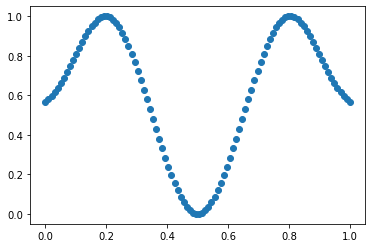

In [11]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

### QNN

In [5]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=5),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_1D"))

epoch: 0, loss: 0.13209024177543846
epoch: 1, loss: 0.11440680469598491
epoch: 2, loss: 0.1027552604707016
epoch: 3, loss: 0.08988679141641795
epoch: 4, loss: 0.07959109915967323
epoch: 5, loss: 0.07347983770870156
epoch: 6, loss: 0.06956901619041175
epoch: 7, loss: 0.06526933723665074
epoch: 8, loss: 0.06101588426182048
epoch: 9, loss: 0.057893622879691825
epoch: 10, loss: 0.0557600065117
epoch: 11, loss: 0.05441768451676799
epoch: 12, loss: 0.05419954928904867
epoch: 13, loss: 0.05495167901644336
epoch: 14, loss: 0.055578014299572605
epoch: 15, loss: 0.05541153859407137
epoch: 16, loss: 0.05483193376059643
epoch: 17, loss: 0.05427750924699657
epoch: 18, loss: 0.05373289165851596
epoch: 19, loss: 0.053153225810155344
epoch: 20, loss: 0.05267760833608299
epoch: 21, loss: 0.05235811083020934
epoch: 22, loss: 0.052040251168435844
epoch: 23, loss: 0.051589435459180814
epoch: 24, loss: 0.051096392355337146
epoch: 25, loss: 0.0507572895697857
epoch: 26, loss: 0.050605738215689235
epoch: 27,

In [6]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [5],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_1D_2"))

epoch: 0, loss: 0.10532612648318006
epoch: 1, loss: 0.0950843681266217
epoch: 2, loss: 0.08589157214200861
epoch: 3, loss: 0.0777693878709735
epoch: 4, loss: 0.07129066464678031
epoch: 5, loss: 0.06629647770597295
epoch: 6, loss: 0.06252594506100619
epoch: 7, loss: 0.0602326223104478
epoch: 8, loss: 0.0592359634198268
epoch: 9, loss: 0.05924097904375527
epoch: 10, loss: 0.05965542875470903
epoch: 11, loss: 0.059611619885659654
epoch: 12, loss: 0.058893081281640614
epoch: 13, loss: 0.05772891565949274
epoch: 14, loss: 0.05642512360412467
epoch: 15, loss: 0.055284531702181304
epoch: 16, loss: 0.054563968765456494
epoch: 17, loss: 0.05436133692937492
epoch: 18, loss: 0.05450374523915266
epoch: 19, loss: 0.054678068815129294
epoch: 20, loss: 0.05464460989884012
epoch: 21, loss: 0.05430397373458801
epoch: 22, loss: 0.05370520651100903
epoch: 23, loss: 0.05302790169193508
epoch: 24, loss: 0.05248668964940049
epoch: 25, loss: 0.05219213999514818
epoch: 26, loss: 0.052100321907955716
epoch: 27

In [7]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [6],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=3),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_1D_3"))

epoch: 0, loss: 0.13088905684647234
epoch: 1, loss: 0.11819851186573099
epoch: 2, loss: 0.11339199316912929
epoch: 3, loss: 0.11183678777995237
epoch: 4, loss: 0.11051236598865995
epoch: 5, loss: 0.1085382550070879
epoch: 6, loss: 0.1050031136827332
epoch: 7, loss: 0.10000858790799574
epoch: 8, loss: 0.09486052322526753
epoch: 9, loss: 0.09107681776214108
epoch: 10, loss: 0.08874730260326996
epoch: 11, loss: 0.08680296812548682
epoch: 12, loss: 0.0850651046088233
epoch: 13, loss: 0.08399551461270911
epoch: 14, loss: 0.08353067847712811
epoch: 15, loss: 0.08288069801994323
epoch: 16, loss: 0.08158729711270936
epoch: 17, loss: 0.07983539872092713
epoch: 18, loss: 0.07809801901391611
epoch: 19, loss: 0.07685574990720458
epoch: 20, loss: 0.07627560469216299
epoch: 21, loss: 0.07591716495432159
epoch: 22, loss: 0.075234927121309
epoch: 23, loss: 0.07425813485697944
epoch: 24, loss: 0.07326838138738241
epoch: 25, loss: 0.07223814702059121
epoch: 26, loss: 0.07088289476606348
epoch: 27, loss:

Process ForkPoolWorker-29:
Process ForkPoolWorker-25:
Process ForkPoolWorker-22:
Process ForkPoolWorker-26:
Process ForkPoolWorker-30:
Process ForkPoolWorker-24:
Process ForkPoolWorker-28:


KeyboardInterrupt: 

### QCN

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots=0)
    
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2"))

### DNN

In [9]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         activation = [Tanh(), Identity()],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_100"))

In [10]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         activation = [Tanh(), Identity()],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_10000"))

## 2D function

### Generate Data

In [11]:
n = 12
x, y = generate_2D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn[:,0:1]])
x_dnn = scaler(x, mode="standard")

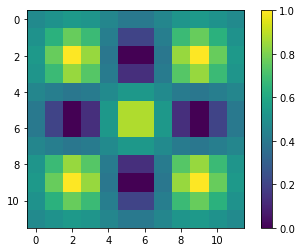

In [12]:
plt.imshow(y.reshape(n,n))
plt.colorbar()
plt.show()

### Training Models

### QNN

In [8]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=10),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_2D"))

epoch: 0, loss: 0.07013283589351635
epoch: 1, loss: 0.056516319964252215
epoch: 2, loss: 0.04798150173865559
epoch: 3, loss: 0.04581213403154008
epoch: 4, loss: 0.043839570096269855
epoch: 5, loss: 0.04058047904438728
epoch: 6, loss: 0.03946655111334087
epoch: 7, loss: 0.039806303326709945
epoch: 8, loss: 0.03998617955479706
epoch: 9, loss: 0.03985229308172952
epoch: 10, loss: 0.03919460809280099
epoch: 11, loss: 0.03853872247052692
epoch: 12, loss: 0.038358171719759776
epoch: 13, loss: 0.03826562721150733
epoch: 14, loss: 0.03790829679298562
epoch: 15, loss: 0.03749627249837904
epoch: 16, loss: 0.03716034898954449
epoch: 17, loss: 0.036800166623352615
epoch: 18, loss: 0.0364610411337796
epoch: 19, loss: 0.03635221485813865
epoch: 20, loss: 0.03648092999756507
epoch: 21, loss: 0.03660774693341411
epoch: 22, loss: 0.036603276253938194
epoch: 23, loss: 0.0365365372103302
epoch: 24, loss: 0.03649109307086237
epoch: 25, loss: 0.03643578830342303
epoch: 26, loss: 0.03631939214511516
epoch: 

### QCN

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qcn_list.append([qcn, x_qcn, y, False])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   

saver(qcn_list, data_path("trainability_qcn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
   
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2"))

### DNN

In [13]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         activation = [Tanh(), Tanh(), Identity()],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_100"))

In [14]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         activation = [Tanh(), Tanh(), Identity()],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_10000"))

## 3D function

### Generate Data

In [15]:
n = 6
x, y = generate_3D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = x_qcn
x_dnn = scaler(x, mode="standard")

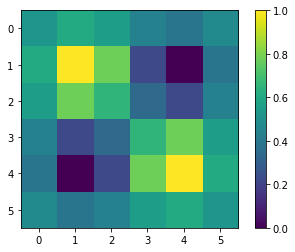

In [16]:
plt.imshow(y.reshape(n,n,n)[1])
plt.colorbar()
plt.show()

### QNN

In [11]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [5],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=11),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_3D"))

epoch: 0, loss: 0.030833617985558084
epoch: 1, loss: 0.030247041311208728
epoch: 2, loss: 0.02350912040519421
epoch: 3, loss: 0.024701122495593916
epoch: 4, loss: 0.024100254928790334
epoch: 5, loss: 0.021488260858062977
epoch: 6, loss: 0.02145526409352309
epoch: 7, loss: 0.021906443126305936
epoch: 8, loss: 0.021193105270017214
epoch: 9, loss: 0.020614032134376487
epoch: 10, loss: 0.020683446724597536
epoch: 11, loss: 0.02085096565639248
epoch: 12, loss: 0.020821605405740153
epoch: 13, loss: 0.020676847037667683
epoch: 14, loss: 0.020479998449086087
epoch: 15, loss: 0.020262769665705484
epoch: 16, loss: 0.020112797587682193
epoch: 17, loss: 0.02008149999197412
epoch: 18, loss: 0.020096317895330333
epoch: 19, loss: 0.02006682295727245
epoch: 20, loss: 0.019985547343352453
epoch: 21, loss: 0.019898218877782124
epoch: 22, loss: 0.019834762390935106
epoch: 23, loss: 0.01979418512657666
epoch: 24, loss: 0.01977105507279797
epoch: 25, loss: 0.019754667853251893
epoch: 26, loss: 0.0197263702

### QCN

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_2"))

### DNN

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         activation = [Tanh(), Tanh(), Identity()],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         activation = [Tanh(), Tanh(), Identity()],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_10000"))